In [1]:
import numpy as np

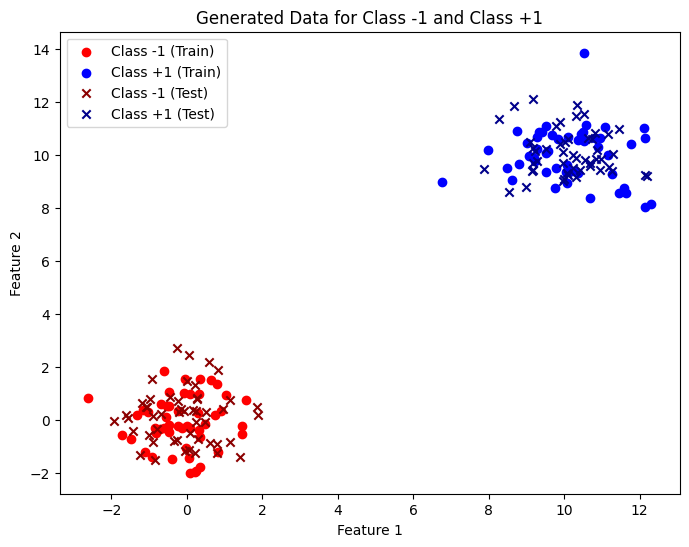

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distributions
mu1 = [0, 0]  # Mean for class -1
mu2 = [10, 10]  # Mean for class +1
sigma = np.eye(2)  # Identity matrix as the covariance matrix (σ = I)

np.random.seed(42)

# Generate 100 data points for each class
class_minus_1_train = np.random.multivariate_normal(mu1, sigma, 50)  # 50 points for training class -1
class_minus_1_test = np.random.multivariate_normal(mu1, sigma, 50)   # 50 points for testing class -1

class_plus_1_train = np.random.multivariate_normal(mu2, sigma, 50)   # 50 points for training class +1
class_plus_1_test = np.random.multivariate_normal(mu2, sigma, 50)    # 50 points for testing class +1

# Combine the training and test sets
X_train = np.vstack((class_minus_1_train, class_plus_1_train))  # Training data
X_test = np.vstack((class_minus_1_test, class_plus_1_test))    # Test data

# Create the corresponding labels for training and test sets
y_train = np.concatenate((np.ones(50) * -1, np.ones(50)))  # Labels: -1 for class -1, +1 for class +1
y_test = np.concatenate((np.ones(50) * -1, np.ones(50)))   # Labels for test data

# Optional: Plot the generated data to visualize the distribution
plt.figure(figsize=(8, 6))
plt.scatter(class_minus_1_train[:, 0], class_minus_1_train[:, 1], color='red', label='Class -1 (Train)')
plt.scatter(class_plus_1_train[:, 0], class_plus_1_train[:, 1], color='blue', label='Class +1 (Train)')
plt.scatter(class_minus_1_test[:, 0], class_minus_1_test[:, 1], color='darkred', label='Class -1 (Test)', marker='x')
plt.scatter(class_plus_1_test[:, 0], class_plus_1_test[:, 1], color='darkblue', label='Class +1 (Test)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Data for Class -1 and Class +1')
plt.show()

In [12]:
X_train.shape

(100, 2)

In [25]:
rows, cols = X_train.shape
rows

100

In [33]:
# Initialization
nv = nw = 0
v = w = np.zeros(cols)
itercnt = 0


In [34]:
# Randomly choose an input pattern x_j and associated label from training set
np.random.seed(42)
random_index = np.random.choice(rows)
xj = X_train[random_index]
yj = y_train[random_index]

In [35]:
# Compute neuron's output given xj
yhat = 1 if np.dot(v, xj) >= 0 else -1
yhat

1

In [36]:
# If v correctly classifies xj (i.e. yhatj * yj > 0)
if yhat * yj > 0:
    nv = nv + 1
else:
    if nv > nw:
        wi = v
        nw = nv
    
    v += yj * xj
    nv = 0

In [37]:
itercnt = itercnt + 1

In [41]:
rows, cols = X_train.shape
maxitercnt = 100
nv = nw = 0
v = w = np.zeros(cols)
itercnt = 0
while itercnt <= maxitercnt:
    random_index = np.random.choice(rows)
    xj, yj = X_train[random_index], y_train[random_index]
    yhat = 1 if np.dot(v, xj) >= 0 else -1

    if yhat * yj > 0:
        nv += 1
    else:
        if nv > nw:
            w = v
            nw = nv
        
        v += yj * xj
        nv = 0
    
    itercnt += 1


print("Final Pocket Weights:", w)

Final Pocket Weights: [9.53996567 4.82733037]


In [47]:
def classify(X, maxitercnt=10000):
    rows, cols = X.shape
    maxitercnt = 100
    nv = nw = 0
    v = w = np.zeros(cols)
    itercnt = 0
    np.random.seed(42)
    while itercnt <= maxitercnt:
        random_index = np.random.choice(rows)
        xj, yj = X_train[random_index], y_train[random_index]
        yhat = 1 if np.dot(v, xj) >= 0 else -1

        if yhat * yj > 0:
            nv += 1
        else:
            if nv > nw:
                w = v
                nw = nv
            
            v += yj * xj
            nv = 0
        
        itercnt += 1

    return w


weights = classify(X_train)

In [58]:
def predict(X: np.ndarray, y: np.ndarray):
    return np.dot(X, y)

# np.dot(weights, X_test[1])

# print(weights.shape, X_test.shape, y_test.shape)
# np.dot(X_test, weights)